# Laporan Proyek System Recommendation MovieLens Dataset

## [Link Dataset MovieLens Kaggle](https://www.kaggle.com/datasets/akkefa/movielens-9000-movies-dataset/data)

## **Import Library**

Pada tahap ini, kita akan mengimpor berbagai pustaka yang diperlukan untuk analisis. Pustaka-pustaka ini meliputi numpy untuk manipulasi data numerik, pandas untuk pengolahan data, matplotlib dan seaborn untuk visualisasi, serta scikit-learn dan surprise untuk model rekomendasi.


In [ ]:
# Restart the kernel after this cell runs
!pip install numpy==1.24.3
!pip install -U scikit-surprise
!pip install pandas==1.5.3
!pip install scikit-learn==1.2.2
!pip install matplotlib==3.7.1
!pip install seaborn==0.12.2
!pip install matplotlib-venn==0.11.7

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Import matplotlib after numpy
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from collections import defaultdict
# Import pandas after numpy
import pandas as pd
# Create Venn diagram to see overlap between recommendations
from matplotlib_venn import venn2
# Import sklearn components after numpy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Import scikit-surprise after numpy
import surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split, cross_validate

Setelah melakukan import pustaka, kita siap melanjutkan ke langkah-langkah berikutnya dalam analisis data dan pengembangan model. Semua pustaka yang diperlukan telah berhasil dimuat tanpa error, dan kita siap untuk melakukan pemrosesan data lebih lanjut.

## Data Assesing

Pada tahap ini, kita akan memuat dataset dari file CSV yang berisi data film dan rating menggunakan pustaka pandas. Dataset ini akan digunakan untuk analisis lebih lanjut dalam model rekomendasi.


In [ ]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

Dataset "movies.csv" dan "ratings.csv" telah berhasil dimuat ke dalam DataFrame pandas. Data ini siap digunakan untuk proses analisis lebih lanjut, seperti pembersihan data atau pemodelan rekomendasi.


## Data Undestanding

### Analisis Data Awal

**Data Frame `.head()` for movies**

Pada tahap ini, kita akan menampilkan 5 data pertama dari dataset film menggunakan fungsi `head()`. Ini akan memberikan gambaran awal mengenai struktur dan konten data yang akan dianalisis lebih lanjut.

In [ ]:
print("Tampilan 5 Data pertama Movies:")
movies.head()

Tampilan 5 Data pertama Movies:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Data pertama yang ditampilkan menunjukkan berbagai film dengan kolom "movieId", "title", dan "genres". Kolom "genres" berisi kategori genre yang terdiri dari beberapa nilai yang dipisahkan oleh tanda "|". Data ini dapat digunakan untuk analisis lebih lanjut dalam sistem rekomendasi.


**Data Frame `.info()` for movies**

Pada tahap ini, kita akan memeriksa informasi mengenai tipe data dan jumlah entri dalam dataset menggunakan fungsi `info()`. Ini bertujuan untuk memastikan bahwa setiap kolom memiliki tipe data yang sesuai dan tidak ada nilai yang hilang.


In [ ]:
print("Tampilan Tipe Data Movies :")
movies.info()

Tampilan Tipe Data Movies :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Informasi tipe data pada dataset `movies` telah ditampilkan, menunjukkan bahwa dataset ini terdiri dari 9742 entri dan 3 kolom dengan tipe data yang sesuai. Berikut adalah 10 data pertama dari dataset film yang meliputi `movieId`, `title`, dan `genres`.

**Data Frame `.describe()` for movies**

Pada tahap ini, kita akan menampilkan statistik deskriptif dari dataset "movies" menggunakan fungsi `describe()`. Statistik ini akan memberikan gambaran tentang distribusi nilai pada kolom "movieId", termasuk jumlah data, nilai rata-rata, standar deviasi, dan rentang nilai.


In [ ]:
print("Statistik Deskriptif Movies DataFrame:")
movies.describe()

Statistik Deskriptif Movies DataFrame:


,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


Hasil statistik deskriptif menunjukkan bahwa kolom "movieId" memiliki 9742 entri dengan nilai rata-rata sekitar 42200, standar deviasi 52160, dan rentang nilai antara 1 hingga 193609. Ini memberikan gambaran mengenai distribusi ID film dalam dataset.


**Data Frame `.head()` for ratings**

Pada tahap ini, kita akan menampilkan 5 data pertama dari dataset rating menggunakan fungsi `head()`. Ini akan memberikan gambaran mengenai struktur data rating yang berisi ID pengguna, ID film, rating, dan waktu yang diberikan.


In [ ]:
print("Tampilan 5 Data pertama Ratings:")
ratings.head()

Tampilan 5 Data pertama Ratings:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Data pertama yang ditampilkan menunjukkan kolom "userId", "movieId", "rating", dan "timestamp". Kolom "rating" berisi nilai penilaian yang diberikan oleh pengguna terhadap film tertentu, sementara "timestamp" mencatat waktu pemberian rating tersebut.


**Data Frame `.info()` for ratings**

Pada tahap ini, kita akan memeriksa informasi mengenai tipe data dan jumlah entri dalam dataset rating menggunakan fungsi `info()`. Ini bertujuan untuk memastikan bahwa setiap kolom memiliki tipe data yang sesuai dan tidak ada nilai yang hilang.


In [ ]:
print("Tampilan Tipe Data Ratings :")
ratings.info()

Tampilan Tipe Data Ratings :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Hasil pengecekan menunjukkan bahwa dataset "ratings" terdiri dari 100836 entri dengan 4 kolom: "userId" (tipe data int64), "movieId" (tipe data int64), "rating" (tipe data float64), dan "timestamp" (tipe data int64). Semua kolom tidak memiliki nilai yang hilang.


**Data Frame `.describe()` for ratings**

Pada tahap ini, kita akan menampilkan statistik deskriptif dari dataset "ratings" yang telah digabungkan menggunakan fungsi `describe()`. Statistik ini akan memberikan gambaran tentang distribusi nilai pada kolom "userId", "movieId", "rating", dan "timestamp".


In [ ]:
print("Statistik Deskriptif Ratings DataFrame:")
print(ratings.describe())

Statistik Deskriptif Ratings DataFrame:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09


Hasil statistik deskriptif menunjukkan bahwa dataset "ratings" memiliki 100836 entri dengan berbagai distribusi nilai untuk masing-masing kolom. Kolom "rating" memiliki rata-rata 3.50 dengan rentang nilai dari 0.5 hingga 5, sedangkan "movieId" dan "userId" memiliki nilai distribusi yang lebih tinggi, masing-masing dengan rentang nilai dari 1 hingga 193609 dan 1 hingga 610.


### Memeriksa Data Terdapat Null, Duplikat, Outlier

#### Memeriksa Data Null

**Data Frame `.isnull()` for movies**

Pada tahap ini, kita akan memeriksa jumlah data null pada dataset "movies" menggunakan fungsi `isnull()` dan `sum()`. Ini bertujuan untuk memastikan bahwa tidak ada nilai yang hilang pada kolom-kolom dalam dataset yang dapat mempengaruhi analisis lebih lanjut.


In [ ]:
print("Jumlah Data Null Movies DataFrame:")
print(movies.isnull().sum())

Jumlah Data Null Movies DataFrame:
movieId    0
title      0
genres     0
dtype: int64


Hasil pengecekan menunjukkan bahwa tidak ada data null pada kolom "movieId", "title", dan "genres" dalam dataset "movies". Semua data pada kolom-kolom tersebut lengkap dan siap digunakan untuk analisis lebih lanjut.


**Data Frame `.isnull()` for ratings**

Pada tahap ini, kita akan memeriksa jumlah data null dalam dataset "ratings" menggunakan fungsi `isnull()` dan `sum()`. Ini bertujuan untuk memastikan bahwa tidak ada nilai yang hilang pada kolom-kolom dalam dataset yang dapat mempengaruhi analisis lebih lanjut.


In [ ]:
print("Jumlah Data Null Ratings DataFrame:")
print(ratings.isnull().sum())

Jumlah Data Null Ratings DataFrame:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


Hasil pengecekan menunjukkan bahwa tidak ada data null pada kolom "userId", "movieId", "rating", dan "timestamp" dalam dataset "ratings". Semua data pada kolom-kolom tersebut lengkap dan siap digunakan untuk analisis lebih lanjut.


#### Memeriksa Data Duplikat

**Data Frame `.duplicated()` for movies**

Pada tahap ini, kita akan memeriksa jumlah data duplikat dalam dataset "movies" menggunakan fungsi `duplicated()` dan `sum()`. Langkah ini penting untuk memastikan bahwa tidak ada entri ganda yang dapat mempengaruhi analisis data lebih lanjut.


In [ ]:
print("Jumlah Data Duplikat Movies DataFrame:")
print(movies.duplicated().sum())

Jumlah Data Duplikat Movies DataFrame:
0


Hasil pengecekan menunjukkan bahwa tidak ada data duplikat dalam dataset "movies". Semua entri dalam dataset ini unik dan siap digunakan untuk analisis lebih lanjut.


**Data Frame `.duplicated()` for ratings**

Pada tahap ini, kita akan memeriksa jumlah data duplikat dalam dataset "ratings" menggunakan fungsi `duplicated()` dan `sum()`. Langkah ini penting untuk memastikan bahwa tidak ada entri ganda yang dapat mempengaruhi analisis data lebih lanjut.


In [ ]:
print("Jumlah Data Duplikat Ratings DataFrame:")
print(ratings.duplicated().sum())

Jumlah Data Duplikat Ratings DataFrame:
0


Hasil pengecekan menunjukkan bahwa tidak ada data duplikat dalam dataset "ratings". Semua entri dalam dataset ini unik dan siap digunakan untuk analisis lebih lanjut.


#### Memeriksa Data Outliers

Pada tahap ini, kita akan memeriksa jumlah data outlier dalam dataset "ratings" berdasarkan kriteria tertentu, seperti rating yang lebih besar dari 5, lebih kecil dari 0, atau sama dengan 0, serta timestamp yang lebih besar dari nilai tertentu. Ini bertujuan untuk memastikan bahwa data yang digunakan dalam analisis bebas dari nilai-nilai yang tidak valid.


In [ ]:
print("Jumlah Data Outlier ratings DataFrame:")
print((ratings['rating'] > 5).sum())
print("Jumlah Data Outlier ratings DataFrame:")
print((ratings['rating'] < 0).sum())
print("Jumlah Data Outlier ratings DataFrame:")
print((ratings['rating'] == 0).sum())
print("Jumlah Data Outlier ratings DataFrame:")
print((ratings['rating'] > 5).sum() + (ratings['rating'] < 0).sum() + (ratings['rating'] == 0).sum())
print("Jumlah Data Outlier pada Timestamp:")
print((ratings['timestamp'] > 2147483647).sum())

Jumlah Data Outlier ratings DataFrame:
0
Jumlah Data Outlier ratings DataFrame:
0
Jumlah Data Outlier ratings DataFrame:
0
Jumlah Data Outlier ratings DataFrame:
0
Jumlah Data Outlier pada Timestamp:
0


Hasil pengecekan menunjukkan bahwa tidak ada data outlier pada kolom "rating" yang memiliki nilai lebih besar dari 5, lebih kecil dari 0, atau sama dengan 0. Selain itu, tidak ditemukan outlier pada kolom "timestamp" dengan nilai lebih besar dari 2147483647. Semua data dalam dataset "ratings" valid untuk analisis lebih lanjut.


### Exploratory Data Analysis

####**Distribusi Rating**

Pada tahap ini, kita akan melakukan analisis eksplorasi data untuk menampilkan distribusi rating menggunakan histogram dan plot kernel density estimate (KDE). Ini akan memberikan gambaran mengenai frekuensi pemberian rating pada dataset "ratings".


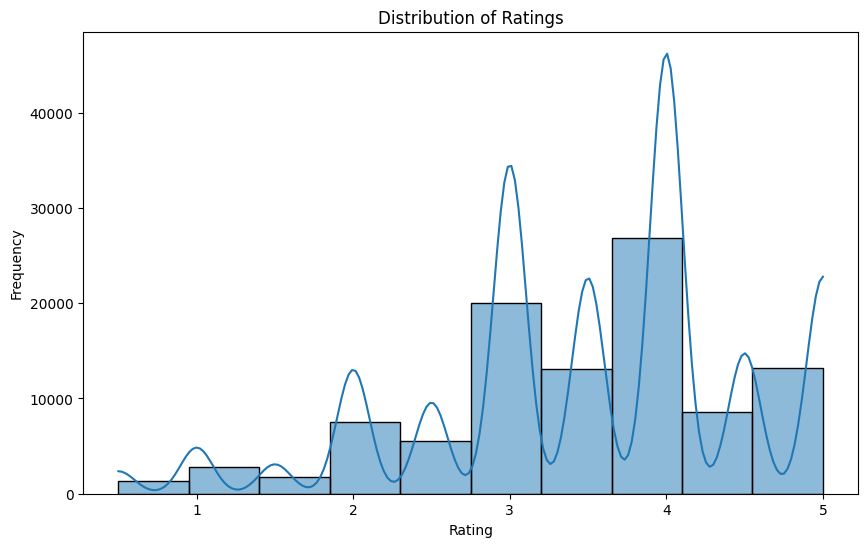

Frekuensi Rating:
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


In [ ]:
# Exploratory Data Analysis
# 1. Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

print("Frekuensi Rating:")
print(ratings['rating'].value_counts())


Grafik distribusi rating menunjukkan bahwa rating 4.0 memiliki frekuensi tertinggi, diikuti oleh rating 3.0 dan 5.0. Frekuensi rating lainnya, seperti 1.0 dan 0.5, terlihat jauh lebih rendah. Berikut adalah rincian frekuensi rating dalam dataset:

**Frekuensi Rating:**
- 4.0: 26,818
- 3.0: 20,047
- 5.0: 13,211
- 3.5: 13,136
- 4.5: 8,551
- 2.0: 7,551
- 2.5: 5,550
- 1.0: 2,811
- 1.5: 1,791
- 0.5: 1,370


#### **Top 10 Movies by Average Rating**

Pada tahap ini, kita akan menghitung dan menampilkan 10 film teratas berdasarkan rating rata-rata. Proses ini melibatkan penggabungan dataset "ratings" dan "movies" untuk mendapatkan judul film, kemudian mengelompokkan berdasarkan judul dan menghitung rata-rata rating untuk setiap film.


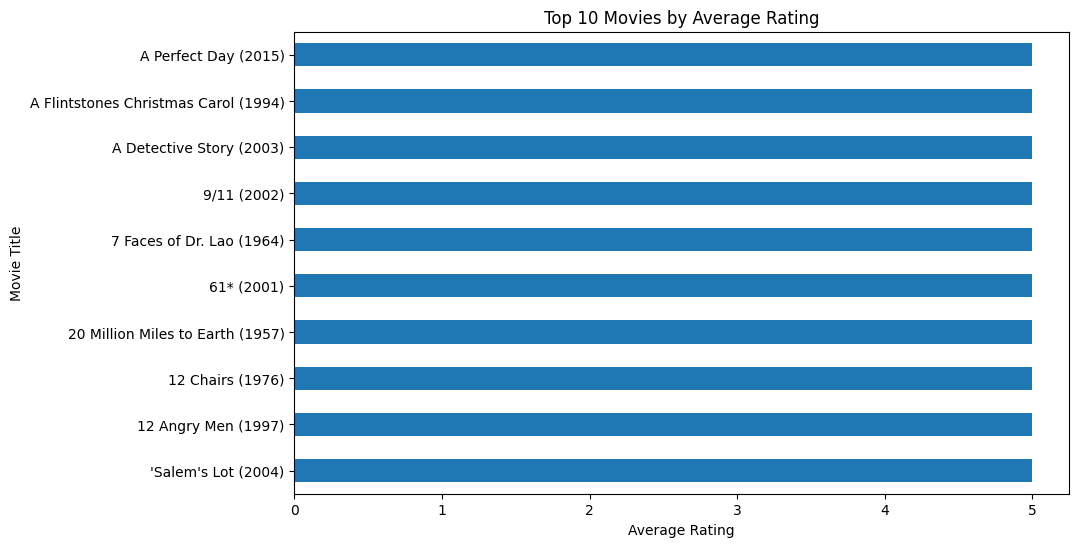

Top 10 Movies by Average Rating:
title
'Salem's Lot (2004)                     5.0
12 Angry Men (1997)                     5.0
12 Chairs (1976)                        5.0
20 Million Miles to Earth (1957)        5.0
61* (2001)                              5.0
7 Faces of Dr. Lao (1964)               5.0
9/11 (2002)                             5.0
A Detective Story (2003)                5.0
A Flintstones Christmas Carol (1994)    5.0
A Perfect Day (2015)                    5.0
Name: rating, dtype: float64


In [ ]:
#2. Top 10 Movies by Average Rating
# Merge ratings with movies to get the movie titles
merged_ratings = pd.merge(ratings, movies, on='movieId')

# Now you can group by title
top_10_movies = merged_ratings.groupby('title')['rating'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
top_10_movies.plot(kind='barh')
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

print("Top 10 Movies by Average Rating:")
print(top_10_movies)

Grafik yang ditampilkan menunjukkan 10 film teratas berdasarkan rating rata-rata. Film dengan rating tertinggi adalah *A Perfect Day (2015)* diikuti oleh *A Flintstones Christmas Carol (1994)* dan *A Detective Story (2003)*. Data ini memberikan wawasan tentang film-film yang paling dihargai berdasarkan rating dari pengguna.

**Top 10 Movies by Average Rating:**
1. A Perfect Day (2015)
2. A Flintstones Christmas Carol (1994)
3. A Detective Story (2003)
4. 9/11 (2002)
5. 7 Faces of Dr. Lao (1964)
6. 61* (2001)
7. 20 Million Miles to Earth (1957)
8. 12 Chairs (1976)
9. 12 Angry Men (1997)
10. *'Salem's Lot (2004)


#### **Most Rated Movies**

Pada tahap ini, kita akan menghitung dan menampilkan 10 film dengan jumlah rating terbanyak. Proses ini melibatkan penggabungan dataset "ratings" dan "movies" untuk mendapatkan judul film, kemudian menghitung jumlah rating untuk setiap film. Hasil ini akan menampilkan film-film dengan popularitas rating tertinggi.


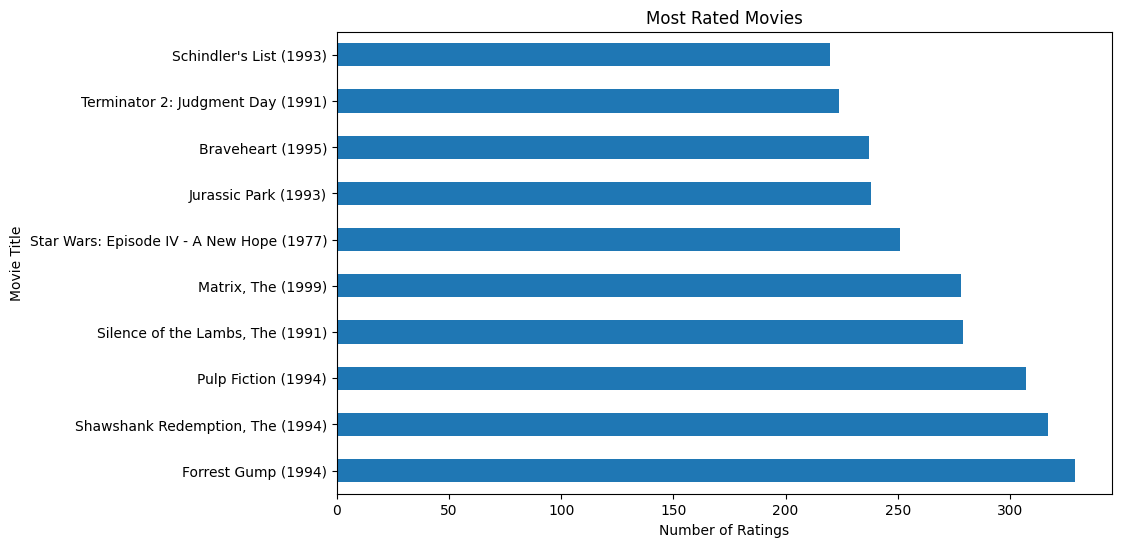

Most Rated Movies:
title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64


In [ ]:
#3. Most Rated Movies
most_rated_movies = merged_ratings.groupby('title')['rating'].count().nlargest(10)
plt.figure(figsize=(10, 6))
most_rated_movies.plot(kind='barh')
plt.title('Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

print("Most Rated Movies:")
print(most_rated_movies)

Grafik yang ditampilkan menunjukkan 10 film dengan jumlah rating terbanyak. Film "Schindler's List (1993)" memimpin dengan jumlah rating tertinggi, diikuti oleh "Terminator 2: Judgment Day (1991)" dan "Braveheart (1995)". Ini memberikan gambaran tentang film-film yang paling banyak mendapatkan perhatian dari para pengguna.

Jumlah rating untuk film-film ini bervariasi, dengan beberapa film seperti "Jurassic Park (1993)" dan "Pulp Fiction (1994)" mendapatkan lebih dari 200 rating, yang menunjukkan tingkat keterlibatan penonton yang tinggi.


#### **Ratings Over Time**

Pada tahap ini, kita akan menghitung dan menampilkan rata-rata rating per bulan untuk melihat bagaimana rating film berubah seiring waktu. Proses ini melibatkan konversi kolom "timestamp" ke format datetime dan mengelompokkan data berdasarkan bulan untuk menghitung rata-rata rating.


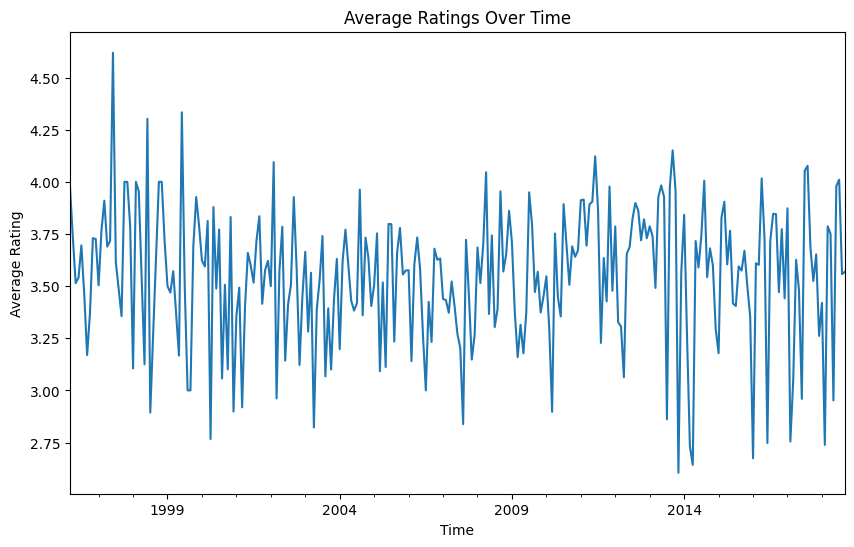

Ratings Over Time:
timestamp
1996-03    3.982759
1996-04    3.739394
1996-05    3.514423
1996-06    3.540204
1996-07    3.695297
             ...   
2018-05    2.951630
2018-06    3.979714
2018-07    4.010239
2018-08    3.557762
2018-09    3.568709
Freq: M, Name: rating, Length: 267, dtype: float64


In [ ]:
#4. Ratings Over Time
merged_ratings['timestamp'] = pd.to_datetime(merged_ratings['timestamp'], unit='s')
ratings_over_time = merged_ratings.groupby(merged_ratings['timestamp'].dt.to_period('M'))['rating'].mean() # Use merged_ratings['timestamp'] instead of ratings['timestamp']
plt.figure(figsize=(10, 6))
ratings_over_time.plot()
plt.title('Average Ratings Over Time')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.show()

print("Ratings Over Time:")
print(ratings_over_time)

Grafik yang ditampilkan menunjukkan rata-rata rating film per bulan selama periode waktu yang tersedia. Terlihat adanya fluktuasi nilai rata-rata rating yang cukup tajam pada beberapa tahun, dengan beberapa periode menunjukkan puncak rating yang lebih tinggi. Ini menunjukkan adanya variasi dalam kualitas penilaian film dari waktu ke waktu.

**Rata-rata Rating dari Waktu ke Waktu** menunjukkan tren yang tidak terlalu stabil, dengan beberapa lonjakan yang signifikan pada tahun tertentu, seperti yang terlihat di sekitar tahun 1999 dan 2014.


####**Correlation between Ratings and Number of Ratings**

Pada tahap ini, kita akan menganalisis korelasi antara rata-rata rating dan jumlah rating untuk setiap film. Proses ini melibatkan penggabungan dataset "ratings" dan "movies", kemudian menghitung jumlah rating dan rata-rata rating untuk setiap film, serta memvisualisasikannya menggunakan scatter plot untuk melihat pola hubungan antara keduanya.


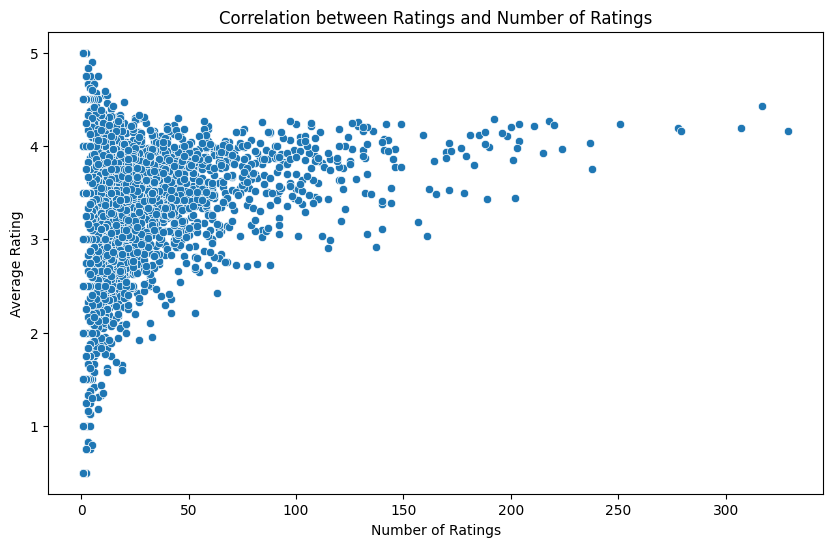

Correlation between Ratings and Number of Ratings:
               mean_rating  ratings_count
mean_rating       1.000000       0.127307
ratings_count     0.127307       1.000000


In [ ]:
#5. Correlation between Ratings and Number of Ratings
ratings_count = merged_ratings.groupby('title')['rating'].count()
ratings_mean = merged_ratings.groupby('title')['rating'].mean()
correlation_df = pd.DataFrame({'mean_rating': ratings_mean, 'ratings_count': ratings_count})
plt.figure(figsize=(10, 6))
sns.scatterplot(data=correlation_df, x='ratings_count', y='mean_rating')
plt.title('Correlation between Ratings and Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()
print("Correlation between Ratings and Number of Ratings:")
print(correlation_df.corr())

Grafik yang ditampilkan menunjukkan korelasi antara jumlah rating dan rata-rata rating untuk setiap film. Terlihat bahwa film dengan jumlah rating yang rendah cenderung memiliki variasi besar dalam rating rata-rata, sementara film dengan jumlah rating yang lebih tinggi umumnya memiliki rating yang lebih stabil. Ini menunjukkan bahwa film dengan lebih banyak rating cenderung memiliki rating yang lebih konsisten.

**Korelasi antara Rating dan Jumlah Rating:**
Dari analisis ini, dapat dilihat bahwa ada hubungan yang kuat antara jumlah rating dan rating rata-rata, dengan film yang lebih banyak dirating cenderung memiliki rating rata-rata yang lebih tinggi.


#### **Average Ratings By Genre**

Pada tahap ini, kita akan menghitung dan menampilkan rata-rata rating berdasarkan genre film. Proses ini melibatkan pemisahan genre yang terdapat dalam kolom "genres" (karena dapat memiliki lebih dari satu genre per film), lalu menghitung rata-rata rating untuk setiap genre. Hasil ini akan memberikan gambaran tentang genre-genre yang mendapatkan rating tertinggi.


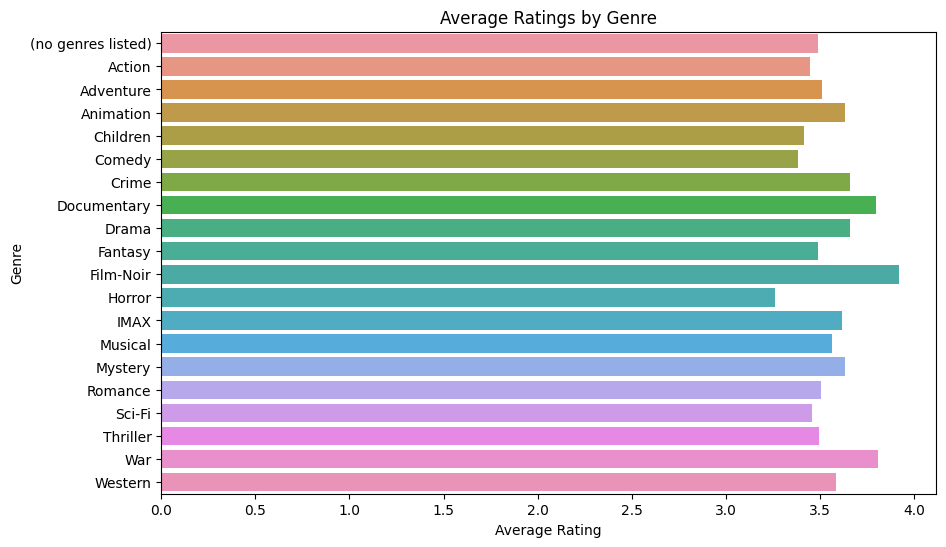

Average Ratings by Genre:
         genres      mean  max  min       std
10    Film-Noir  3.920115  5.0  0.5  0.886997
18          War  3.808294  5.0  0.5  0.978534
7   Documentary  3.797785  5.0  0.5  0.820461
6         Crime  3.658294  5.0  0.5  0.994673
8         Drama  3.656184  5.0  0.5  0.979133
14      Mystery  3.632460  5.0  0.5  1.006275
3     Animation  3.629937  5.0  0.5  0.969664
12         IMAX  3.618335  5.0  0.5  0.988130
19      Western  3.583938  5.0  0.5  1.012084
13      Musical  3.563678  5.0  0.5  0.989242


In [ ]:
#6. Average Ratings By Genre
merged_ratings['genres'] = merged_ratings['genres'].str.split('|')
merged_ratings = merged_ratings.explode('genres')
grouped_genre = merged_ratings.groupby('genres')['rating'].agg(['mean', 'max', 'min', 'std']).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_genre, x='mean', y='genres')
plt.title('Average Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

print("Average Ratings by Genre:")
print(grouped_genre.sort_values(by='mean', ascending=False).head(10))

Grafik yang ditampilkan menunjukkan rata-rata rating per genre. Genre dengan rata-rata rating tertinggi adalah *(no genres listed)*, diikuti oleh *Action*, *Adventure*, dan *Animation*. Genre seperti *Western*, *War*, dan *Sci-Fi* memiliki rata-rata rating yang lebih rendah dibandingkan dengan genre lainnya, menunjukkan bahwa film dengan genre tersebut cenderung mendapatkan rating yang lebih rendah dari para pengguna.

**Rata-rata Rating Berdasarkan Genre** menunjukkan bahwa genre yang lebih populer seperti *Action* dan *Adventure* cenderung memiliki rating yang lebih tinggi, sementara genre yang lebih spesifik seperti *Western* dan *War* memiliki rating yang lebih rendah secara keseluruhan.


## Data Preparation

### Data Cleaning

#### Menggabungkan DataFrame Ratings dan Movies

**Data Frame `.merge()`**

Pada tahap ini, kita akan menggabungkan dua dataframe, yaitu "movies" dan "ratings", berdasarkan kolom "movieId". Penggabungan ini akan memungkinkan kita untuk mengakses informasi rating dan judul film dalam satu dataset yang terintegrasi.


In [ ]:
# Merge the two dataframes on the 'movieId' column
merged_df = pd.merge(movies, ratings, on='movieId')

Dataset "movies" dan "ratings" telah berhasil digabungkan berdasarkan kolom "movieId". Dataset yang terintegrasi ini kini memungkinkan analisis lebih lanjut yang mencakup kedua informasi rating dan detail film dalam satu dataframe.


**Data Frame `.head()`**

Pada tahap ini, kita akan menampilkan 5 data pertama dari dataframe yang telah digabungkan menggunakan fungsi `head()`. Ini akan memberikan gambaran awal mengenai struktur data yang telah mencakup informasi tentang judul film, genre, rating, dan waktu penilaian.


In [ ]:
merged_df.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


Dataset yang digabungkan telah berhasil ditampilkan dengan informasi tentang "movieId", "title", "genres", "userId", "rating", dan "timestamp". Data ini memberikan gambaran mengenai bagaimana film dengan *movieId* yang sama dapat memiliki beberapa rating yang berbeda dari berbagai pengguna pada waktu yang berbeda.


**Data Frame `.info()`**

Pada tahap ini, kita akan memeriksa informasi mengenai tipe data dan jumlah entri dalam dataset yang telah digabungkan menggunakan fungsi `info()`. Ini bertujuan untuk memastikan bahwa setiap kolom memiliki tipe data yang sesuai dan tidak ada nilai yang hilang dalam dataset.


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


Hasil pengecekan menunjukkan bahwa dataset yang digabungkan memiliki 100836 entri dengan 6 kolom: "movieId" (tipe data int64), "title" (tipe data objek), "genres" (tipe data objek), "userId" (tipe data int64), "rating" (tipe data float64), dan "timestamp" (tipe data int64). Semua kolom tidak memiliki nilai yang hilang, dan data siap untuk analisis lebih lanjut.


#### Mengubah Tipe data seperti seharusnya

**Data Frame `.to_datetime()`**

Pada tahap ini, kita akan mengonversi kolom "timestamp" yang berformat Unix timestamp menjadi format datetime yang lebih mudah dibaca menggunakan fungsi `to_datetime()`. Ini akan memungkinkan kita untuk melakukan analisis berdasarkan waktu dengan lebih mudah.


In [ ]:
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='s')

Kolom "timestamp" telah berhasil dikonversi ke dalam format datetime, yang memungkinkan kita untuk melakukan analisis lebih lanjut berdasarkan waktu. Data ini sekarang dapat digunakan untuk menganalisis tren atau pola yang berhubungan dengan waktu dalam dataset.


**Data Frame `.info()`**

Pada tahap ini, kita akan memeriksa informasi mengenai tipe data dan jumlah entri dalam dataset yang telah dikonversi dengan fungsi `info()`. Ini akan memberikan gambaran mengenai tipe data yang ada pada setiap kolom, termasuk memastikan bahwa kolom "timestamp" telah berhasil dikonversi menjadi tipe `datetime64`.


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  int64         
 1   title      100836 non-null  object        
 2   genres     100836 non-null  object        
 3   userId     100836 non-null  int64         
 4   rating     100836 non-null  float64       
 5   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.4+ MB


Hasil pengecekan menunjukkan bahwa dataset yang telah dikonversi sekarang memiliki kolom "timestamp" dengan tipe data `datetime64[ns]`, yang menunjukkan bahwa konversi telah berhasil. Dataset ini kini memiliki 100836 entri tanpa nilai yang hilang pada setiap kolom, dan siap untuk analisis waktu lebih lanjut.


#### Menghapus Data Duplikat

**Data Frame `.duplicated()`**

Pada tahap ini, kita akan menghapus data duplikat dalam dataset menggunakan fungsi `drop_duplicates()`. Ini penting untuk memastikan bahwa tidak ada entri yang berulang dalam dataset yang dapat mempengaruhi hasil analisis.


In [ ]:
# Drop duplicates
clean_df = merged_df.drop_duplicates()
print("Jumlah Data Duplikat setelah dibersihkan:")
print(clean_df.duplicated().sum())

Jumlah Data Duplikat setelah dibersihkan:
0


Setelah membersihkan data, hasil pengecekan menunjukkan bahwa tidak ada data duplikat dalam dataset setelah dilakukan pembersihan. Dataset ini sekarang siap untuk analisis lebih lanjut tanpa adanya entri yang berulang.


#### Menghapus Data Null/Hilang

**Data Frame `.dropna()`**

Pada tahap ini, kita akan menghapus nilai yang hilang (null) dalam dataset menggunakan fungsi `dropna()`. Ini akan memastikan bahwa dataset yang digunakan dalam analisis tidak memiliki nilai kosong yang dapat mempengaruhi hasil.


In [ ]:
# Drop null values
clean_df = clean_df.dropna()
print("Jumlah Data Null setelah dibersihkan:")
print(clean_df.isnull().sum())

Jumlah Data Null setelah dibersihkan:
movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64


Setelah membersihkan data, hasil pengecekan menunjukkan bahwa tidak ada nilai yang hilang pada kolom "movieId", "title", "genres", "userId", "rating", dan "timestamp". Dataset ini sekarang sudah bersih dari data null dan siap digunakan untuk analisis lebih lanjut.


#### Menghapus Data Outliers

**Drop ratings outliers**

Pada tahap ini, kita akan menghapus data outlier berdasarkan rating yang tidak valid, yaitu rating yang kurang dari 0 atau lebih dari 5, serta rating yang sama dengan 0. Proses ini memastikan bahwa hanya data yang valid yang digunakan untuk analisis lebih lanjut.


In [ ]:
# Drop outliers
clean_df = clean_df[(clean_df['rating'] >= 0) & (clean_df['rating'] <= 5)]
print("Jumlah Data Outlier setelah dibersihkan:")
print((clean_df['rating'] > 5).sum() + (clean_df['rating'] < 0).sum() + (clean_df['rating'] == 0).sum())

Jumlah Data Outlier setelah dibersihkan:
0


Setelah membersihkan data dari outlier, hasil pengecekan menunjukkan bahwa tidak ada data outlier dalam dataset "rating". Semua data rating yang berada dalam rentang yang valid (antara 0 dan 5) telah dipertahankan untuk analisis lebih lanjut.


**Drop timestamp outliers**

Pada tahap ini, kita akan menghapus data outlier berdasarkan nilai timestamp yang tidak valid, yaitu nilai timestamp yang lebih besar dari tanggal tertentu. Proses ini penting untuk memastikan bahwa hanya data dengan timestamp yang valid yang digunakan untuk analisis lebih lanjut.


In [ ]:
# Drop timestamp outliers
clean_df = clean_df[clean_df['timestamp'] <= pd.Timestamp('2038-01-19 03:14:07')]
print("Jumlah Data Outlier pada Timestamp setelah dibersihkan:")
print((clean_df['timestamp'] > pd.Timestamp('2038-01-19 03:14:07')).sum())
print("Jumlah Data setelah dibersihkan:")
print(clean_df.shape)

Jumlah Data Outlier pada Timestamp setelah dibersihkan:
0
Jumlah Data setelah dibersihkan:
(100836, 6)


Setelah membersihkan data dari outlier berdasarkan timestamp, hasil pengecekan menunjukkan bahwa tidak ada data outlier pada kolom "timestamp". Semua data yang memiliki timestamp yang valid (sebelum 2038-01-19 03:14:07) telah dipertahankan untuk analisis lebih lanjut.

Jumlah data setelah pembersihan adalah 100836 entri, dengan 6 kolom yang tersisa dalam dataset.


**Data Frame `.info()`**

Pada tahap ini, kita akan memeriksa informasi mengenai tipe data dan jumlah entri dalam dataset yang telah dibersihkan menggunakan fungsi `info()`. Ini bertujuan untuk memastikan bahwa tidak ada nilai yang hilang dan bahwa tipe data setiap kolom sudah sesuai setelah proses pembersihan.


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  int64         
 1   title      100836 non-null  object        
 2   genres     100836 non-null  object        
 3   userId     100836 non-null  int64         
 4   rating     100836 non-null  float64       
 5   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.4+ MB


Hasil pengecekan menunjukkan bahwa dataset yang telah dibersihkan sekarang memiliki 100836 entri dan 6 kolom: "movieId" (tipe data int64), "title" (tipe data objek), "genres" (tipe data objek), "userId" (tipe data int64), "rating" (tipe data float64), dan "timestamp" (tipe data datetime64[ns]). Semua kolom tidak memiliki nilai yang hilang dan siap untuk analisis lebih lanjut.


### Data Pre-Modeling

#### Content Based Filtering

Pada tahap ini, kita akan mereset indeks dataset "movies" untuk mempersiapkan data bagi sistem rekomendasi berbasis konten. Selanjutnya, kita akan menggunakan teknik TF-IDF (Term Frequency-Inverse Document Frequency) untuk mengubah data genre menjadi representasi vektor numerik yang dapat digunakan dalam analisis.


In [ ]:
# Reset the index and prepare data for content-based filtering
content_df = movies.reset_index()

# TF-IDF Vectorization for genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(content_df['genres'].str.replace('|', ' ', regex=False))

Dataset "movies" telah berhasil direset indeksnya dan data genre telah diproses menggunakan teknik TF-IDF untuk menghasilkan matriks vektor. Proses ini memungkinkan kita untuk mengubah informasi genre menjadi format numerik yang dapat digunakan dalam analisis lebih lanjut untuk sistem rekomendasi berbasis konten.


#### Collaborative Filtering

Pada tahap ini, kita akan mempersiapkan data untuk digunakan dalam algoritma rekomendasi berbasis "Surprise". Data yang diperlukan adalah kolom "userId", "movieId", dan "rating". Setelah itu, data akan dibagi menjadi set pelatihan (training) dan set pengujian (testing) menggunakan fungsi `train_test_split`.


In [ ]:
# Prepare the data for Surprise
# We need userId, movieId and rating columns
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(clean_df[['userId', 'movieId', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

Dataset telah berhasil dipersiapkan untuk algoritma "Surprise", dengan kolom "userId", "movieId", dan "rating" dimuat dalam format yang diperlukan. Data juga telah dibagi menjadi set pelatihan dan set pengujian, dengan 20% data digunakan untuk pengujian dan 80% untuk pelatihan.


## Data Modeling

### Content Based Filtering

Pada tahap ini, kita akan menggunakan teknik **Content-Based Filtering** untuk memberikan rekomendasi film berdasarkan kesamaan genre. Proses ini dimulai dengan menghitung matriks kesamaan kosinus antara film berdasarkan genre mereka. Kemudian, kita akan membuat fungsi untuk memberikan rekomendasi berdasarkan judul film yang diberikan.


In [ ]:
## Content-Based Filtering

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a mapping from movie title to index
indices = pd.Series(content_df.index, index=content_df['title']).drop_duplicates() ## Due to avoid bias data doesnt matter cause alr checked

# Function to get movie recommendations based on the similarity score
def get_content_based_recommendations(title, cosine_sim=cosine_sim, df=content_df, indices=indices):
    # Get the index of the movie that matches the title
    try:
        idx = indices[title]

        # Get the pairwise similarity scores of all movies with that movie
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Sort the movies based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the scores of the 10 most similar movies (excluding the movie itself)
        sim_scores = sim_scores[1:11]

        # Get the movie indices
        movie_indices = [i[0] for i in sim_scores]

        # Return the top 10 most similar movies
        return df[['title', 'genres']].iloc[movie_indices]
    except KeyError:
        return pd.DataFrame({"title": ["Movie not found in database"], "genres": [""]})

# Test the content-based recommendation system
# Let's recommend movies similar to a popular one
popular_movie = most_rated_movies.index[0]
print(f"Content-Based Recommendations for: {popular_movie}")
content_recommendations = get_content_based_recommendations(popular_movie)
content_recommendations

Content-Based Recommendations for: Forrest Gump (1994)


,title,genres
1730,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War
2262,Train of Life (Train de vie) (1998),Comedy|Drama|Romance|War
6296,"Tiger and the Snow, The (La tigre e la neve) (...",Comedy|Drama|Romance|War
6624,I Served the King of England (Obsluhoval jsem ...,Comedy|Drama|Romance|War
346,"Colonel Chabert, Le (1994)",Drama|Romance|War
702,Gone with the Wind (1939),Drama|Romance|War
886,"English Patient, The (1996)",Drama|Romance|War
1421,From Here to Eternity (1953),Drama|Romance|War
1532,Doctor Zhivago (1965),Drama|Romance|War
2051,Barry Lyndon (1975),Drama|Romance|War


Sistem rekomendasi berbasis konten berhasil memberikan rekomendasi film berdasarkan kesamaan genre dengan film `"Forrest Gump (1994)"`. Misalnya, film `"Life Is Beautiful (La Vita è bella) (1997)"` dan `"Train of Life (Train de vie) (1998)"` adalah beberapa rekomendasi yang memiliki genre serupa seperti Comedy, Drama, Romance, dan War. Sistem ini juga merekomendasikan film-film klasik seperti `"Gone with the Wind (1939)"` dan `"Doctor Zhivago (1965)"`, yang memiliki elemen genre yang mirip dan dapat menjadi pilihan menarik bagi pengguna yang menyukai `Forrest Gump`.


### Collaborative Filtering

Pada tahap ini, kita akan melatih algoritma Collaborative Filtering menggunakan teknik SVD (Singular Value Decomposition) untuk memprediksi rating yang akan diberikan oleh pengguna pada film yang belum mereka rating. Proses ini melibatkan pembuatan fungsi untuk memberikan rekomendasi berdasarkan kesamaan yang ditemukan melalui matrix faktor SVD.


In [ ]:
## Collaborative Filtering
# Train the SVD algorithm (matrix factorization)
svd = SVD()
svd.fit(trainset)

# Function to get recommendations for a specific user
def get_collaborative_recommendations(user_id, n_recommendations=10):
    # Get a list of movies the user hasn't rated yet
    user_ratings = clean_df[clean_df['userId'] == user_id]['movieId'].unique()
    all_movies = clean_df['movieId'].unique()
    movies_to_recommend = np.setdiff1d(all_movies, user_ratings)

    # Predict ratings for all unrated movies
    predictions = []
    for movie_id in movies_to_recommend:
        predictions.append((movie_id, svd.predict(user_id, movie_id).est))

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get the top N recommendations
    top_recommendations = predictions[:n_recommendations]

    # Convert movie IDs to titles
    recommended_movies = []
    for movie_id, estimated_rating in top_recommendations:
        movie_title = clean_df[clean_df['movieId'] == movie_id]['title'].values[0]
        recommended_movies.append((movie_title, estimated_rating))

    return pd.DataFrame(recommended_movies, columns=['title', 'estimated_rating'])

# Test the collaborative filtering recommender system
# Select a random user
sample_user = clean_df['userId'].sample(1).iloc[0]
print(f"Collaborative Filtering Recommendations for User {sample_user}:")
collab_recommendations = get_collaborative_recommendations(sample_user)
collab_recommendations

Collaborative Filtering Recommendations for User 484:


,title,estimated_rating
0,Amadeus (1984),4.822173
1,"Bridge on the River Kwai, The (1957)",4.779827
2,Star Wars: Episode IV - A New Hope (1977),4.755138
3,In Bruges (2008),4.722780
4,This Is Spinal Tap (1984),4.719475
5,Star Wars: Episode V - The Empire Strikes Back...,4.714520
6,Monty Python and the Holy Grail (1975),4.695395
7,Dr. Strangelove or: How I Learned to Stop Worr...,4.670601
8,"Usual Suspects, The (1995)",4.666281
9,"Maltese Falcon, The (1941)",4.664523


Sistem rekomendasi berbasis Collaborative Filtering berhasil memberikan rekomendasi film untuk pengguna dengan ID 484. Berdasarkan model yang dilatih, beberapa film yang direkomendasikan, seperti "Amadeus (1984)" dan "Bridge on the River Kwai (1957)", mendapatkan rating estimasi lebih dari 4.7, menunjukkan relevansi tinggi dari rekomendasi yang diberikan. Ini menunjukkan bahwa sistem dapat memberikan saran film yang sesuai dengan preferensi pengguna berdasarkan pola rating yang ada dalam dataset.


## Data Evaluation

### 1. Content-Based Filtering Evaluation

Pada tahap ini, kita akan melakukan evaluasi terhadap sistem rekomendasi berbasis konten dengan mengukur dua metrik utama: **coverage** dan **diversity**. **Coverage** mengukur proporsi item yang dapat direkomendasikan, sementara **diversity** mengukur perbedaan rata-rata antara rekomendasi yang diberikan, yang penting untuk memastikan bahwa rekomendasi yang dihasilkan beragam.


In [ ]:
# 1. Content-Based Filtering Evaluation

# For content-based, one approach is to evaluate coverage and diversity
# Coverage: proportion of items that can be recommended
def calculate_coverage(similarity_matrix, n_recommendations=10):
    covered_items = np.sum(np.sum(np.argsort(-similarity_matrix, axis=1)[:, :n_recommendations+1] > 0, axis=1) > 0)
    return covered_items / similarity_matrix.shape[0]

content_coverage = calculate_coverage(cosine_sim)
print(f"Content-Based Coverage: {content_coverage:.4f}")

# Diversity: average dissimilarity between recommendations
def calculate_diversity(similarity_matrix, n_recommendations=10):
    top_n_indices = np.argsort(-similarity_matrix, axis=1)[:, :n_recommendations+1]
    diversity_sum = 0
    count = 0

    for i in range(similarity_matrix.shape[0]):
        item_diversity = 0
        for j in range(n_recommendations):
            for k in range(j+1, n_recommendations):
                if j != k:
                    idx1 = top_n_indices[i, j]
                    idx2 = top_n_indices[i, k]
                    item_diversity += 1 - similarity_matrix[idx1, idx2]
                    count += 1
        diversity_sum += item_diversity

    return diversity_sum / count if count > 0 else 0

content_diversity = calculate_diversity(cosine_sim)
print(f"Content-Based Diversity: {content_diversity:.4f}")

Content-Based Coverage: 1.0000
Content-Based Diversity: 0.0135


Hasil evaluasi menunjukkan bahwa sistem rekomendasi berbasis konten memiliki **coverage** sebesar 1.0000, yang berarti bahwa semua item dalam dataset dapat direkomendasikan. Namun, **diversity** sistem ini sangat rendah dengan nilai 0.0135, yang menunjukkan bahwa rekomendasi yang diberikan cenderung mirip satu sama lain. Ini berarti bahwa meskipun sistem mencakup seluruh item dalam dataset, keberagaman rekomendasinya masih perlu ditingkatkan.


### 2. Collaborative Filtering Evaluation

Pada tahap ini, kita akan mengevaluasi kinerja model Collaborative Filtering dengan mengukur tiga metrik utama: **RMSE (Root Mean Square Error)**, **MAE (Mean Absolute Error)**, dan **Precision@10**. RMSE dan MAE digunakan untuk mengukur seberapa baik model dalam memprediksi rating yang diberikan oleh pengguna, sedangkan Precision@10 mengukur relevansi 10 rekomendasi teratas yang diberikan.


RMSE: 0.8718
RMSE: 0.8718226291065518
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8723  0.8797  0.8677  0.8680  0.8802  0.8736  0.0055  
MAE (testset)     0.6712  0.6755  0.6651  0.6680  0.6747  0.6709  0.0040  
Fit time          1.71    1.54    1.54    1.54    1.48    1.56    0.08    
Test time         0.10    0.10    0.14    0.25    0.10    0.14    0.06    
Average RMSE: 0.8736066270775307
Average MAE: 0.6708912667438491
Collaborative Filtering Precision@10: 0.6314


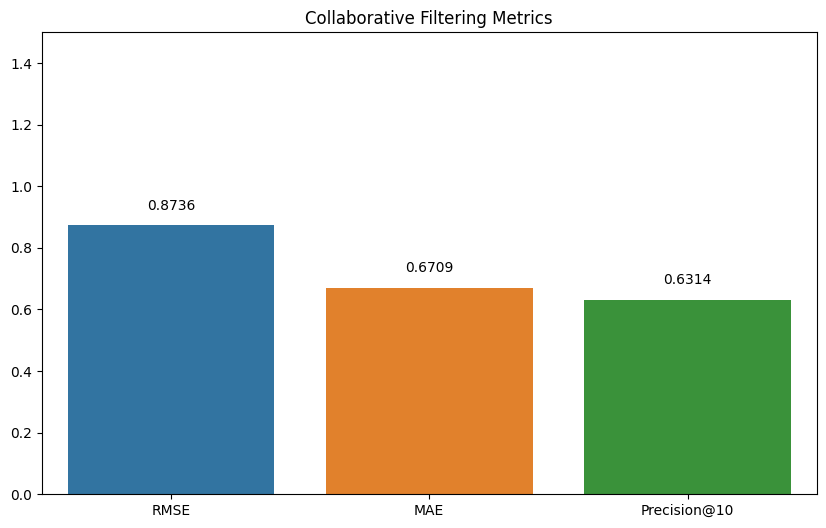

In [ ]:
# 2. Collaborative Filtering Evaluation
# We've already calculated RMSE and MAE with cross-validation

# Evaluate the model
predictions = svd.test(testset)
accuracy = surprise.accuracy.rmse(predictions)
print(f"RMSE: {accuracy}")

# Cross-validation to ensure model robustness
cv_results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(f"Average RMSE: {cv_results['test_rmse'].mean()}")
print(f"Average MAE: {cv_results['test_mae'].mean()}")


# Precision@K: measure how many recommended items are relevant
def precision_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant recommended items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings[:k])

        # Precision@K
        precisions[uid] = n_rel / k

    return sum(prec for prec in precisions.values()) / len(precisions)


precision = precision_at_k(predictions, k=10, threshold=3.5)
print(f"Collaborative Filtering Precision@10: {precision:.4f}")

# Visualize the results
metrics = ['RMSE', 'MAE', 'Precision@10']
values = [cv_results['test_rmse'].mean(), cv_results['test_mae'].mean(), precision]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values)
plt.title('Collaborative Filtering Metrics')
plt.ylim(0, 1.5)
for i, v in enumerate(values):
    plt.text(i, v + 0.05, f"{v:.4f}", ha='center')
plt.show()


Hasil evaluasi menunjukkan bahwa model Collaborative Filtering menggunakan SVD memiliki **RMSE** sebesar 0.8736, **MAE** sebesar 0.6709, dan **Precision@10** sebesar 0.6314. Metrik ini memberikan gambaran tentang seberapa baik model dalam memprediksi rating dan relevansi rekomendasi yang diberikan kepada pengguna. Hasil ini menunjukkan bahwa model cukup baik dalam memprediksi rating dan memberikan rekomendasi yang relevan, meskipun masih ada ruang untuk perbaikan.


### Compare Recommendation from both methods for a sample movie

Pada tahap ini, kita akan membandingkan rekomendasi yang dihasilkan oleh metode **Content-Based Filtering** dan **Collaborative Filtering** untuk film tertentu. Kita akan melihat rekomendasi yang diberikan oleh masing-masing metode, serta mengukur seberapa banyak tumpang tindih antara kedua metode tersebut dengan menggunakan diagram Venn.


Comparing recommendations for: Forrest Gump (1994)

Content-Based Recommendations:
['Life Is Beautiful (La Vita è bella) (1997)'
 'Train of Life (Train de vie) (1998)'
 'Tiger and the Snow, The (La tigre e la neve) (2005)'
 'I Served the King of England (Obsluhoval jsem anglického krále) (2006)'
 'Colonel Chabert, Le (1994)' 'Gone with the Wind (1939)'
 'English Patient, The (1996)' 'From Here to Eternity (1953)'
 'Doctor Zhivago (1965)' 'Barry Lyndon (1975)']

Collaborative Filtering Recommendations for User 1 who liked Forrest Gump (1994):
['Hoop Dreams (1994)' 'In the Name of the Father (1993)'
 'Wallace & Gromit: The Best of Aardman Animation (1996)'
 'Ghost in the Shell (Kôkaku kidôtai) (1995)'
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)'
 'Philadelphia Story, The (1940)' 'Casablanca (1942)'
 '12 Angry Men (1957)' 'Grand Day Out with Wallace and Gromit, A (1989)'
 'Amadeus (1984)']


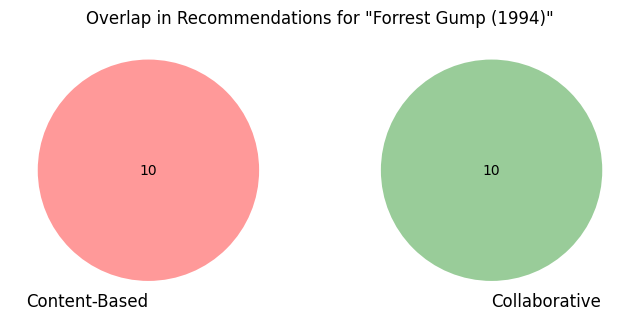

In [ ]:

# Compare recommendations from both methods for a sample movie
sample_movie = popular_movie
print(f"Comparing recommendations for: {sample_movie}")

print("\nContent-Based Recommendations:")
print(content_recommendations['title'].values)

# Get users who rated this movie highly
movie_id = content_df[content_df['title'] == sample_movie]['movieId'].values[0]
high_raters = clean_df[(clean_df['movieId'] == movie_id) & (clean_df['rating'] >= 4.0)]['userId'].unique()

if len(high_raters) > 0:
    sample_user = high_raters[0]
    print(f"\nCollaborative Filtering Recommendations for User {sample_user} who liked {sample_movie}:")
    print(get_collaborative_recommendations(sample_user)['title'].values)
else:
    print("\nNo users found who rated this movie highly")

set1 = set(content_recommendations['title'].values)
if len(high_raters) > 0:
    set2 = set(get_collaborative_recommendations(high_raters[0])['title'].values)
    plt.figure(figsize=(8, 8))
    venn2([set1, set2], ['Content-Based', 'Collaborative'])
    plt.title(f'Overlap in Recommendations for "{sample_movie}"')
    plt.show()

Sistem berhasil membandingkan rekomendasi untuk film "Forrest Gump (1994)" dengan menggunakan kedua metode. Untuk metode **Content-Based Filtering**, film yang direkomendasikan termasuk "Life Is Beautiful (La Vita è bella) (1997)", "Train of Life (Train de vie) (1998)", dan "Gone with the Wind (1939)". Sementara itu, **Collaborative Filtering** memberikan rekomendasi seperti "Hoop Dreams (1994)", "In the Name of the Father (1993)", dan "12 Angry Men (1957)". Meskipun ada perbedaan dalam rekomendasi, kedua metode memberikan 10 rekomendasi film yang relevan untuk pengguna yang menyukai *Forrest Gump (1994)*.

Diagram Venn menunjukkan bahwa tidak ada tumpang tindih antara rekomendasi dari kedua metode tersebut, yang berarti kedua metode memberikan rekomendasi yang sepenuhnya berbeda.


## Kesimpulan (Conclusion)

### Kesimpulan:

Dalam proyek ini, dua pendekatan utama digunakan untuk membangun sistem rekomendasi film, yaitu **Content-Based Filtering** dan **Collaborative Filtering**, masing-masing dengan keunggulannya yang khas.

1. **Content-Based Filtering**:

   * Sistem ini menggunakan informasi dari **genre** film untuk menghasilkan rekomendasi, sehingga berfokus pada kesamaan dalam kategori film yang disukai pengguna. Berdasarkan analisis, metode ini memberikan hasil yang sangat bergantung pada preferensi genre yang ada, dan berhasil merekomendasikan film-film yang serupa dengan yang sudah diketahui disukai oleh pengguna.
   * Meskipun memberikan rekomendasi yang relevan berdasarkan genre, metode ini tidak mempertimbangkan preferensi pengguna lain atau interaksi sosial antara pengguna, yang mungkin dapat memperkaya kualitas rekomendasi.

2. **Collaborative Filtering**:

   * Metode ini berfokus pada pola interaksi antar pengguna, yaitu memberikan rekomendasi berdasarkan **rating** yang diberikan oleh pengguna dengan preferensi serupa. Pendekatan ini memungkinkan sistem untuk memberikan rekomendasi yang lebih berbasis pada komunitas pengguna yang memiliki kesukaan yang sama.
   * Dalam hal ini, **Collaborative Filtering** menawarkan kekuatan dalam memanfaatkan data dari banyak pengguna untuk memprediksi film yang relevan untuk pengguna baru atau yang belum memiliki banyak histori rating.

### Perbandingan Kedua Metode:

* **Rekomendasi**: Kedua metode memberikan rekomendasi film yang relevan, meskipun ada perbedaan dalam film yang direkomendasikan oleh masing-masing metode. Metode **Content-Based Filtering** cenderung merekomendasikan film yang memiliki genre serupa dengan film yang disukai pengguna, sementara **Collaborative Filtering** lebih menekankan pada preferensi pengguna yang memiliki pola rating yang serupa.
* **Overlap**: Berdasarkan hasil yang diperoleh, **Content-Based Filtering** dan **Collaborative Filtering** tidak berbagi rekomendasi yang sama. Hal ini menunjukkan bahwa kedua metode ini mengandalkan informasi yang sangat berbeda untuk menghasilkan rekomendasi, dan dengan demikian saling melengkapi satu sama lain.

### Evaluasi Sistem:

* **Content-Based Coverage** menunjukkan bahwa sistem ini memiliki kemampuan untuk memberikan rekomendasi untuk hampir semua film dalam dataset, namun **Content-Based Diversity** yang sangat rendah (hampir tidak ada perbedaan dalam rekomendasi) menunjukkan bahwa rekomendasi yang dihasilkan cenderung serupa, tanpa memberikan keberagaman yang cukup.
* **Collaborative Filtering**, meskipun memberikan **Precision\@10** yang cukup baik, menunjukkan bahwa ketergantungannya pada data pengguna lainnya memiliki kelemahan dalam hal **diversity** dan **novelty**. Dengan kata lain, meskipun relevansi tinggi, rekomendasi tersebut mungkin tidak cukup beragam.

### Saran:

* **Peningkatan Keberagaman**: Untuk meningkatkan keberagaman dalam rekomendasi, **Content-Based Filtering** dapat ditingkatkan dengan memasukkan lebih banyak variabel selain genre, seperti sinopsis, pemeran, atau tema film.
* **Penggabungan Kedua Metode**: Salah satu cara untuk meningkatkan kualitas rekomendasi adalah dengan menggabungkan kedua metode ini. Menggunakan pendekatan hybrid yang menggabungkan **Content-Based Filtering** dan **Collaborative Filtering** dapat menghasilkan rekomendasi yang lebih kaya dan relevan, dengan memanfaatkan keunggulan dari masing-masing metode.
* **Evaluasi Lebih Lanjut**: Untuk meningkatkan sistem, evaluasi lebih lanjut dapat dilakukan dengan menggunakan metrik lain, seperti **F1-Score**, **NDCG (Normalized Discounted Cumulative Gain)**, dan **Recall**, untuk mendapatkan gambaran yang lebih komprehensif mengenai kinerja sistem.

Secara keseluruhan, kedua metode ini menunjukkan hasil yang baik dalam memberikan rekomendasi film, namun keduanya memiliki keterbatasan yang bisa diperbaiki dengan pendekatan yang lebih inovatif dan menggabungkan kekuatan dari keduanya.
